In [1]:
import sys
sys.path.append("../../src")
import torch
import matplotlib.pyplot as plt
import numpy as np
import torchvision
import torch.nn.functional as F

import glob
import os
from datetime import datetime
import time
import math
from tqdm import tqdm

from itertools import repeat
from torch.nn.parameter import Parameter
import collections
import matplotlib
from torch_utils import *
from ExplicitModels import *
from visualization import *
# matplotlib.use('Agg')

In [2]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda', index=0)

In [3]:
transform = torchvision.transforms.Compose([torchvision.transforms.ToTensor(), 
                                            torchvision.transforms.Normalize(mean=(0.4914, 0.4822, 0.4465), 
                                            std=(3*0.2023, 3*0.1994, 3*0.2010))])

cifar_dset_train = torchvision.datasets.CIFAR10('../../data', train=True, transform=transform, target_transform=None, download=True)
train_loader = torch.utils.data.DataLoader(cifar_dset_train, batch_size=20, shuffle=True, num_workers=0)

cifar_dset_test = torchvision.datasets.CIFAR10('../../data', train=False, transform=transform, target_transform=None, download=True)
test_loader = torch.utils.data.DataLoader(cifar_dset_test, batch_size=20, shuffle=False, num_workers=0)

Files already downloaded and verified
Files already downloaded and verified


In [4]:
activation = F.relu
architecture = [int(32*32*3), 1000, 10]
supervised_lambda_weight = 1e-3
neural_lr_start = 0.01 
neural_lr_stop = 0.01 
neural_lr_rule = "constant"
neural_lr_decay_multiplier = 0.005
neural_dynamic_iterations = 50

model = SupervisedPredictiveCodingNudgedV2_wAutoGrad(architecture, activation, use_stepLR = True, 
                                                   sgd_nesterov = False, optimizer_type = "sgd", 
                                                   optim_lr = 1e-3, stepLR_step_size = 10*3000,)

In [5]:
# x, y = next(iter(train_loader))
# x, y = x.to(device), y.to(device)
# x = x.to(device).view(x.size(0),-1).T
# y_one_hot = F.one_hot(y, 10).to(device).T

# neurons = model.fast_forward(x, no_grad = True)
# model.run_neural_dynamics(x, y_one_hot, neurons, supervised_lambda_weight, 
#                           neural_lr_start, neural_lr_stop, lr_rule = neural_lr_rule, 
#                           lr_decay_multiplier = neural_lr_decay_multiplier, 
#                           neural_dynamic_iterations = neural_dynamic_iterations)

In [6]:
trn_acc_list = []
tst_acc_list = []
random_sign = False
n_epochs = 15

for epoch_ in range(n_epochs):
    for idx, (x, y) in tqdm(enumerate(train_loader)):
        x, y = x.to(device), y.to(device)
        x = x.to(device).view(x.size(0),-1).T
        y_one_hot = F.one_hot(y, 10).to(device).T
        #y_one_hot = 0.94 * y_one_hot + 0.03 * torch.ones(*y_one_hot.shape, device = device)
        if random_sign:
            rnd_sgn = 2*np.random.randint(2) - 1
            supervised_lambda_weight = rnd_sgn * supervised_lambda_weight

        model.batch_step(  x, y_one_hot, supervised_lambda_weight,
                           neural_lr_start, neural_lr_stop, neural_lr_rule,
                           neural_lr_decay_multiplier, neural_dynamic_iterations,
                        )

    trn_acc = evaluatePC(model, train_loader, device, False, 
                         printing = False)
    tst_acc = evaluatePC(model, test_loader, device, False, 
                         printing = False)
    trn_acc_list.append(trn_acc)
    tst_acc_list.append(tst_acc)
    
    print("Epoch : {}, Train Accuracy : {}, Test Accuracy : {}".format(epoch_+1, trn_acc, tst_acc))

2500it [01:41, 24.66it/s]
3it [00:00, 24.47it/s]

Epoch : 1, Train Accuracy : 0.48728, Test Accuracy : 0.4373


2500it [01:41, 24.54it/s]
3it [00:00, 24.41it/s]

Epoch : 2, Train Accuracy : 0.5269, Test Accuracy : 0.465


2500it [01:41, 24.61it/s]
3it [00:00, 24.29it/s]

Epoch : 3, Train Accuracy : 0.54414, Test Accuracy : 0.4692


2500it [01:41, 24.53it/s]
3it [00:00, 24.10it/s]

Epoch : 4, Train Accuracy : 0.56076, Test Accuracy : 0.4713


2500it [01:42, 24.42it/s]
3it [00:00, 24.49it/s]

Epoch : 5, Train Accuracy : 0.58676, Test Accuracy : 0.4855


2500it [01:42, 24.41it/s]
3it [00:00, 24.19it/s]

Epoch : 6, Train Accuracy : 0.60514, Test Accuracy : 0.487


2500it [01:42, 24.33it/s]
3it [00:00, 24.12it/s]

Epoch : 7, Train Accuracy : 0.6293, Test Accuracy : 0.4951


2500it [01:42, 24.34it/s]
3it [00:00, 24.27it/s]

Epoch : 8, Train Accuracy : 0.65126, Test Accuracy : 0.4925


2500it [01:43, 24.25it/s]
3it [00:00, 23.99it/s]

Epoch : 9, Train Accuracy : 0.67096, Test Accuracy : 0.4974


2500it [01:43, 24.23it/s]
3it [00:00, 24.38it/s]

Epoch : 10, Train Accuracy : 0.6952, Test Accuracy : 0.5081


2500it [01:43, 24.22it/s]
3it [00:00, 24.09it/s]

Epoch : 11, Train Accuracy : 0.69954, Test Accuracy : 0.507


2500it [01:43, 24.10it/s]
3it [00:00, 23.73it/s]

Epoch : 12, Train Accuracy : 0.71796, Test Accuracy : 0.5049


2500it [01:44, 23.87it/s]
3it [00:00, 24.16it/s]

Epoch : 13, Train Accuracy : 0.7421, Test Accuracy : 0.5101


2500it [01:43, 24.08it/s]
3it [00:00, 23.42it/s]

Epoch : 14, Train Accuracy : 0.74216, Test Accuracy : 0.5113


2500it [01:45, 23.77it/s]


Epoch : 15, Train Accuracy : 0.76528, Test Accuracy : 0.507


In [10]:
for epoch_ in range(30, n_epochs + 35):
    for idx, (x, y) in tqdm(enumerate(train_loader)):
        x, y = x.to(device), y.to(device)
        x = x.to(device).view(x.size(0),-1).T
        y_one_hot = F.one_hot(y, 10).to(device).T
        #y_one_hot = 0.94 * y_one_hot + 0.03 * torch.ones(*y_one_hot.shape, device = device)
        if random_sign:
            rnd_sgn = 2*np.random.randint(2) - 1
            supervised_lambda_weight = rnd_sgn * supervised_lambda_weight

        model.batch_step(  x, y_one_hot, supervised_lambda_weight,
                           neural_lr_start, neural_lr_stop, neural_lr_rule,
                           neural_lr_decay_multiplier, neural_dynamic_iterations,
                        )

    trn_acc = evaluatePC(model, train_loader, device, False, 
                         printing = False)
    tst_acc = evaluatePC(model, test_loader, device, False, 
                         printing = False)
    trn_acc_list.append(trn_acc)
    tst_acc_list.append(tst_acc)
    
    print("Epoch : {}, Train Accuracy : {}, Test Accuracy : {}".format(epoch_+1, trn_acc, tst_acc))

2500it [01:45, 23.72it/s]
3it [00:00, 23.39it/s]

Epoch : 31, Train Accuracy : 0.9042, Test Accuracy : 0.5116


2500it [01:44, 23.85it/s]
3it [00:00, 23.30it/s]

Epoch : 32, Train Accuracy : 0.9093, Test Accuracy : 0.5074


2500it [01:45, 23.80it/s]
3it [00:00, 23.17it/s]

Epoch : 33, Train Accuracy : 0.9054, Test Accuracy : 0.5072


2500it [01:45, 23.76it/s]
3it [00:00, 23.74it/s]

Epoch : 34, Train Accuracy : 0.91574, Test Accuracy : 0.5088


2500it [01:45, 23.73it/s]
3it [00:00, 22.80it/s]

Epoch : 35, Train Accuracy : 0.92318, Test Accuracy : 0.5097


2500it [01:45, 23.78it/s]
3it [00:00, 23.05it/s]

Epoch : 36, Train Accuracy : 0.927, Test Accuracy : 0.507


2500it [01:45, 23.78it/s]
3it [00:00, 23.84it/s]

Epoch : 37, Train Accuracy : 0.93482, Test Accuracy : 0.5126


2500it [01:45, 23.76it/s]
3it [00:00, 22.02it/s]

Epoch : 38, Train Accuracy : 0.93574, Test Accuracy : 0.505


2500it [01:45, 23.76it/s]
3it [00:00, 22.81it/s]

Epoch : 39, Train Accuracy : 0.93784, Test Accuracy : 0.5116


2500it [01:45, 23.73it/s]
3it [00:00, 23.83it/s]

Epoch : 40, Train Accuracy : 0.94064, Test Accuracy : 0.5071


2500it [01:45, 23.75it/s]
3it [00:00, 22.95it/s]

Epoch : 41, Train Accuracy : 0.94518, Test Accuracy : 0.5035


2500it [01:45, 23.68it/s]
3it [00:00, 23.08it/s]

Epoch : 42, Train Accuracy : 0.94468, Test Accuracy : 0.5037


2500it [01:45, 23.67it/s]
3it [00:00, 23.67it/s]

Epoch : 43, Train Accuracy : 0.94378, Test Accuracy : 0.5054


2500it [01:45, 23.72it/s]
3it [00:00, 23.18it/s]

Epoch : 44, Train Accuracy : 0.9512, Test Accuracy : 0.506


2500it [01:45, 23.63it/s]
3it [00:00, 22.96it/s]

Epoch : 45, Train Accuracy : 0.95202, Test Accuracy : 0.5031


2500it [01:45, 23.65it/s]
3it [00:00, 23.65it/s]

Epoch : 46, Train Accuracy : 0.95612, Test Accuracy : 0.4997


2500it [01:45, 23.66it/s]
3it [00:00, 23.24it/s]

Epoch : 47, Train Accuracy : 0.95464, Test Accuracy : 0.5026


2500it [01:45, 23.61it/s]
3it [00:00, 22.81it/s]

Epoch : 48, Train Accuracy : 0.96154, Test Accuracy : 0.5034


2500it [01:45, 23.60it/s]
3it [00:00, 23.66it/s]

Epoch : 49, Train Accuracy : 0.96524, Test Accuracy : 0.498


2500it [01:45, 23.65it/s]


Epoch : 50, Train Accuracy : 0.96346, Test Accuracy : 0.5045


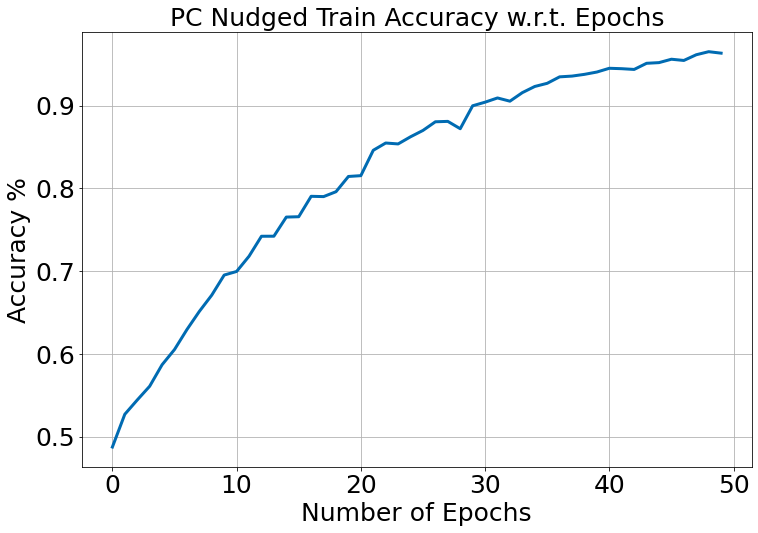

In [11]:
plot_convergence_plot(trn_acc_list, xlabel = 'Number of Epochs', ylabel = 'Accuracy %',
                      title = 'PC Nudged Train Accuracy w.r.t. Epochs', 
                      figsize = (12,8), fontsize = 25, linewidth = 3)

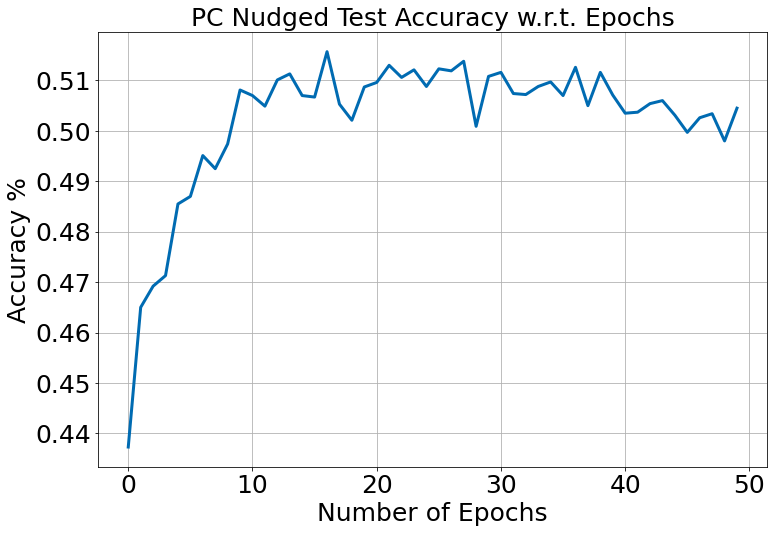

In [12]:
plot_convergence_plot(tst_acc_list, xlabel = 'Number of Epochs', ylabel = 'Accuracy %',
                      title = 'PC Nudged Test Accuracy w.r.t. Epochs', 
                      figsize = (12,8), fontsize = 25, linewidth = 3)